In [1]:

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

import torch.nn.functional as F
from torchsummary import summary

import imageVisualizationHelper 
from batchNormalNeuralNetwork import BatchNormalNeuralNetwork
import commonHelper
import trainLoopHelper
import testLoopHelper
import datasetProvider



In [2]:
DATA_FOLDER = "../../data"
from torch.utils.data import Dataset
image_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


---->TRAINING data with transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

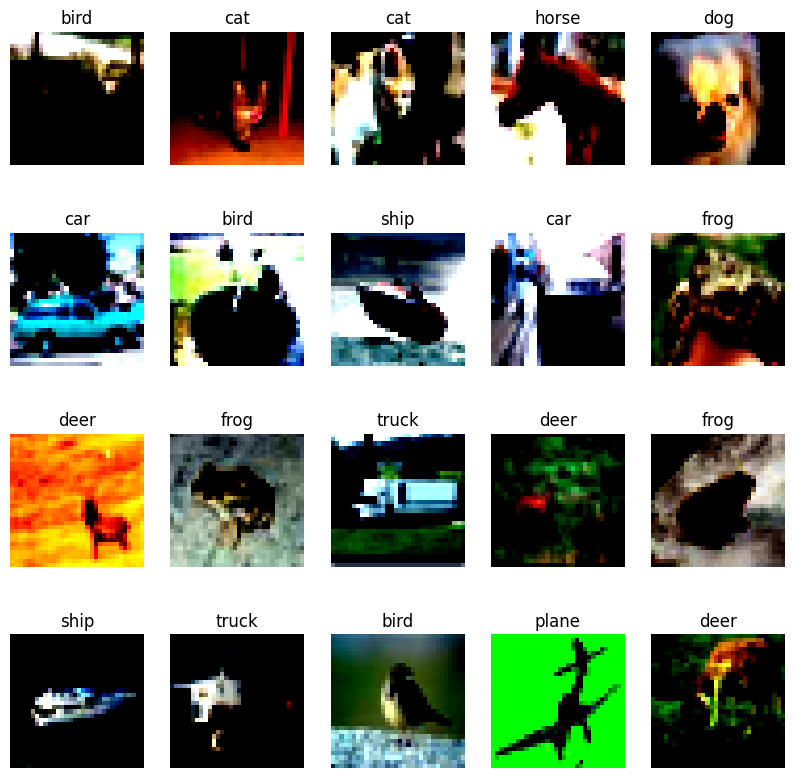

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


---->TEST data with transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

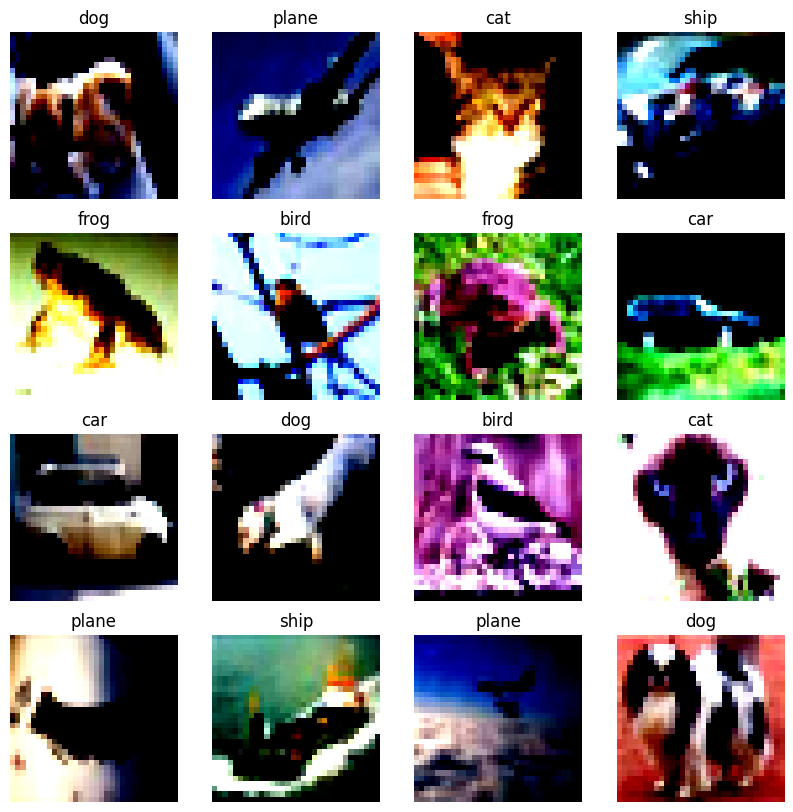

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


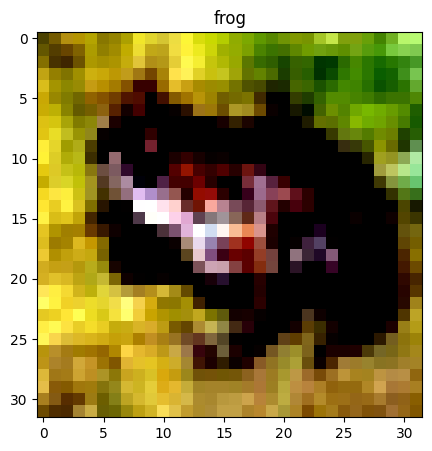

In [3]:

# Download training data from open datasets.

train_transforms = datasetProvider.compose_custom_transforms(datasetProvider.create_basic_transforms_collection())
test_transforms = datasetProvider.compose_custom_transforms(datasetProvider.create_basic_transforms_collection())

train_dataset, test_dataset = datasetProvider.get_CIFAR10_datasets(train_transforms_collection=train_transforms,
                                                                   test_transforms_collection=test_transforms,
                                                                    data_folder=DATA_FOLDER)

print("---->TRAINING data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(train_dataset, image_classes, rows=4, cols=5)


print("---->TEST data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(train_dataset, image_classes, rows=4, cols=4)

# Show single image
sample_idx = torch.randint(0, len(test_dataset), size=(1,))  
image_data, label = test_dataset[sample_idx.item()]
imageVisualizationHelper.show_image(image_data, image_classes[label])


In [4]:

device = commonHelper.get_device(use_seed=True)
BATCH_SIZE = 128
train_dataloader, test_dataloader = datasetProvider.get_dataloaders(train_dataset=train_dataset,
                                                                    test_dataset=test_dataset,
                                                                    batch_size=BATCH_SIZE)
                                                                    


Shape of test_dataloader batch_data [Batch, C, H, W]: torch.Size([128, 3, 32, 32])
Shape of test_dataloader label (label): torch.Size([128]) torch.int64
Labels for a batch of size 128 are tensor([5, 1, 5, 8, 8, 0, 5, 0, 3, 5, 1, 0, 7, 8, 4, 0, 5, 5, 3, 2, 7, 2, 6, 8,
        0, 4, 6, 1, 9, 1, 0, 5, 6, 3, 0, 9, 0, 5, 1, 0, 0, 0, 9, 6, 8, 2, 4, 1,
        6, 8, 8, 6, 0, 8, 6, 1, 3, 7, 0, 5, 6, 2, 6, 7, 3, 2, 9, 9, 8, 7, 3, 0,
        4, 3, 0, 0, 6, 5, 7, 7, 3, 7, 4, 0, 2, 5, 5, 7, 0, 9, 0, 6, 6, 6, 8, 3,
        0, 2, 9, 9, 0, 9, 2, 4, 2, 3, 7, 9, 5, 7, 3, 8, 8, 1, 6, 0, 3, 6, 1, 1,
        3, 3, 1, 4, 7, 2, 9, 3])


In [5]:
def get_model_instance(index=1, input_size=(3,32,32)) -> nn.Module:
    if(index <= 1 ):
        model = BatchNormalNeuralNetwork(drop_out=0.1).to(device=device)
        summary(model=model, input_size=input_size)
        return model


model = get_model_instance(index=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]             256
             ReLU-10            [-1, 8, 32, 32]               0
      BatchNorm2d-11            [-1, 8, 32, 32]              16
          Dropout-12            [-1, 8, 32, 32]               0
        MaxPool2d-13            [-1, 8, 16, 16]               0
           Conv2d-14           [-1, 16,

In [6]:
def get_correct_prediction_count(predictions : torch.Tensor, valid_labels):
  # torch.argmax locates the indices of the maximum elements within a tensor.
  # It does this along a specified dimension (axis).
  return predictions.argmax(dim=1).eq(valid_labels).sum().item()

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []

train_accuracy = []
test_accuracy = []

MAX_IMAGES_FOR_DISPLAY = 20

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []

correctly_predicted_test_images = []
wrongly_predicted_test_images = []

In [14]:

def train_loop(dataloader, model, loss_fn, optimizer : optim.Optimizer):
    batch_train_accuracy, batch_train_losses, correctly_predicted_images, wrongly_predicted_images = trainLoopHelper.train_loop(dataloader, model, loss_fn, optimizer)
    train_accuracy.append(batch_train_accuracy)
    train_losses.append(batch_train_losses)

    if(len(correctly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        correctly_predicted_trained_images.extend(correctly_predicted_images)

    if(len(wrongly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        wrongly_predicted_trained_images.extend(wrongly_predicted_images)


In [15]:


def test_loop(dataloader, model, loss_fn):

        batch_test_accuracy, batch_test_losses, correctly_predicted_images, wrongly_predicted_images = testLoopHelper.test_loop(dataloader, model, loss_fn)
        test_accuracy.append(batch_test_accuracy)
        test_losses.append(batch_test_losses)

        if(len(correctly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            correctly_predicted_test_images.extend(correctly_predicted_images)

        if(len(wrongly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            wrongly_predicted_test_images.extend(wrongly_predicted_images)


In [16]:
LEARNING_RATE = 0.01
EPOCHS = 15
MOMENTUM = 0.9

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []
correctly_predicted_test_images = []
wrongly_predicted_test_images = []


loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=0)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.4, verbose=True)


for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
    scheduler.step()

print("Done!")

Epoch 1


Train: Loss=0.7026 Batch_id=390 Accuracy=72.42: 100%|██████████| 391/391 [00:22<00:00, 17.41it/s]


Test set: Average loss: 60.7136, Accuracy: 7320/10000 (73.20%)

Epoch 2


Train: Loss=0.6122 Batch_id=390 Accuracy=73.42: 100%|██████████| 391/391 [00:23<00:00, 16.39it/s]


Test set: Average loss: 62.3197, Accuracy: 7242/10000 (72.42%)

Epoch 3


Train: Loss=0.7598 Batch_id=390 Accuracy=74.03: 100%|██████████| 391/391 [00:22<00:00, 17.40it/s]


Test set: Average loss: 60.6690, Accuracy: 7307/10000 (73.07%)

Epoch 4


Train: Loss=0.6597 Batch_id=390 Accuracy=74.32: 100%|██████████| 391/391 [00:25<00:00, 15.35it/s]


Test set: Average loss: 67.0139, Accuracy: 7059/10000 (70.59%)

Epoch 5


Train: Loss=0.7603 Batch_id=390 Accuracy=75.00: 100%|██████████| 391/391 [00:23<00:00, 16.55it/s]


Test set: Average loss: 60.0448, Accuracy: 7390/10000 (73.90%)

Epoch 6


Train: Loss=0.8146 Batch_id=390 Accuracy=75.47: 100%|██████████| 391/391 [00:23<00:00, 16.35it/s]


Test set: Average loss: 59.1028, Accuracy: 7447/10000 (74.47%)

Epoch 7


Train: Loss=0.6407 Batch_id=390 Accuracy=77.22: 100%|██████████| 391/391 [00:22<00:00, 17.18it/s]


Test set: Average loss: 56.8065, Accuracy: 7561/10000 (75.61%)

Epoch 8


Train: Loss=0.6159 Batch_id=390 Accuracy=77.56: 100%|██████████| 391/391 [00:27<00:00, 14.24it/s]


Test set: Average loss: 55.7120, Accuracy: 7596/10000 (75.96%)

Epoch 9


Train: Loss=0.5780 Batch_id=390 Accuracy=77.75: 100%|██████████| 391/391 [00:24<00:00, 16.06it/s]


Test set: Average loss: 54.0177, Accuracy: 7685/10000 (76.85%)

Epoch 10


Train: Loss=0.6347 Batch_id=390 Accuracy=78.01: 100%|██████████| 391/391 [00:23<00:00, 16.44it/s]


Test set: Average loss: 54.4533, Accuracy: 7642/10000 (76.42%)

Epoch 11


Train: Loss=0.6297 Batch_id=390 Accuracy=78.19: 100%|██████████| 391/391 [00:24<00:00, 16.14it/s]


Test set: Average loss: 54.7644, Accuracy: 7613/10000 (76.13%)

Epoch 12


Train: Loss=0.6230 Batch_id=390 Accuracy=78.25: 100%|██████████| 391/391 [00:25<00:00, 15.50it/s]


Test set: Average loss: 56.2936, Accuracy: 7584/10000 (75.84%)

Epoch 13


Train: Loss=0.5222 Batch_id=390 Accuracy=78.99: 100%|██████████| 391/391 [00:24<00:00, 15.64it/s]


Test set: Average loss: 53.0920, Accuracy: 7748/10000 (77.48%)

Epoch 14


Train: Loss=0.6263 Batch_id=390 Accuracy=79.07: 100%|██████████| 391/391 [00:24<00:00, 15.84it/s]


Test set: Average loss: 52.6266, Accuracy: 7720/10000 (77.20%)

Epoch 15


Train: Loss=0.6362 Batch_id=390 Accuracy=79.30: 100%|██████████| 391/391 [00:23<00:00, 16.46it/s]


Test set: Average loss: 53.3089, Accuracy: 7739/10000 (77.39%)

Done!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


----****----Wrongly predicted test images: 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


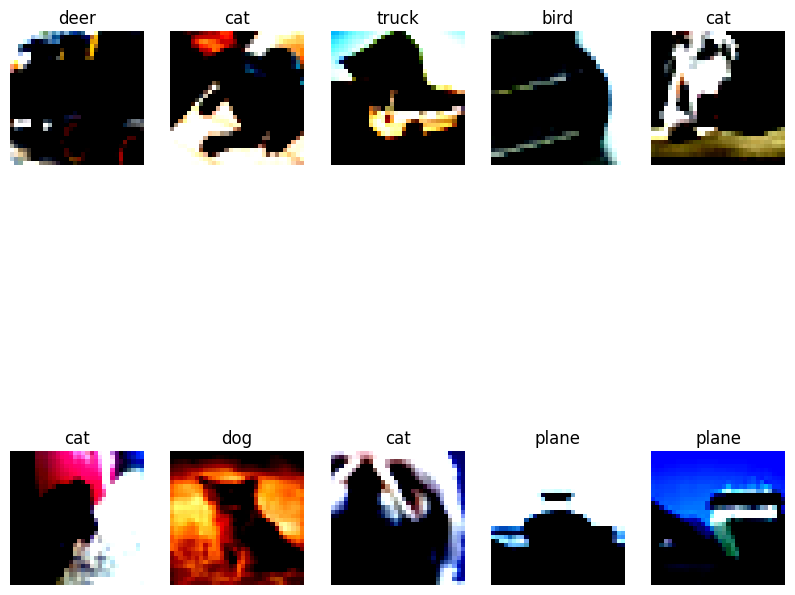

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


----****----Correctly predicted test images: 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


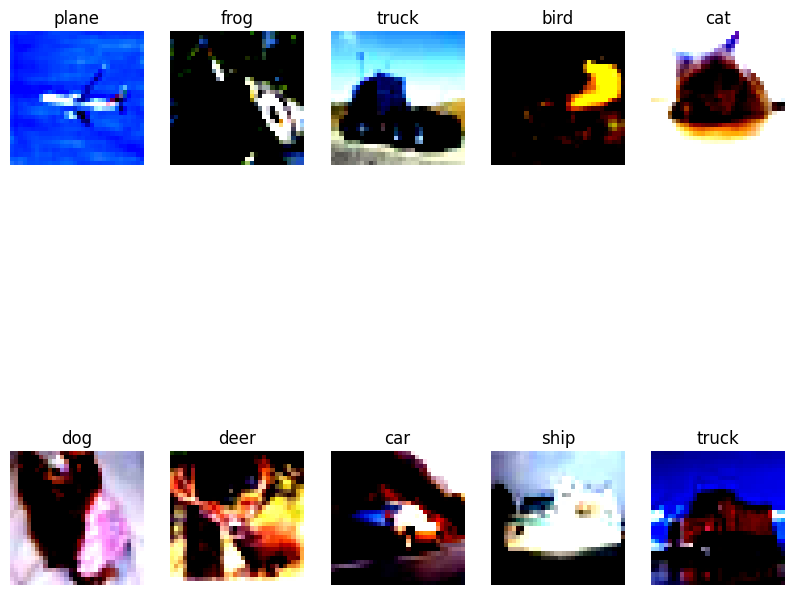

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

----****----Wrongly predicted train images: 20


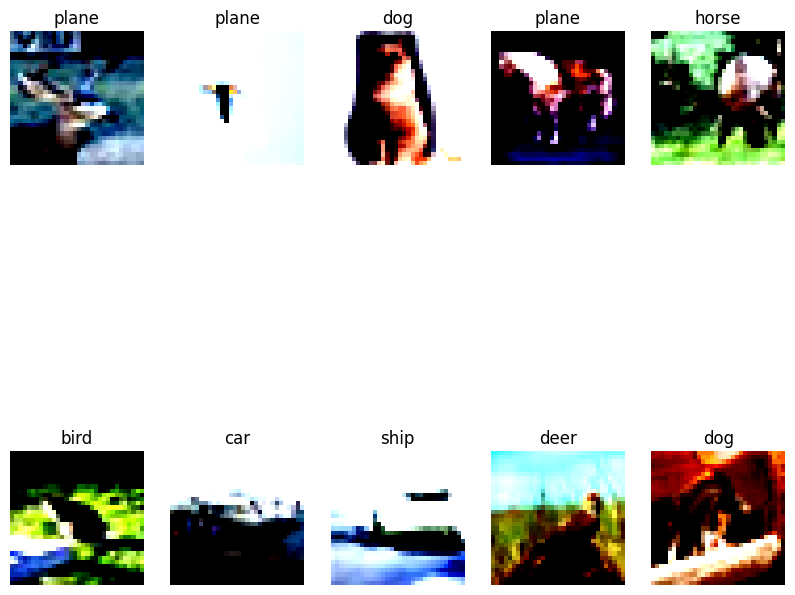

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


----****----Correctly predicted train images: 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


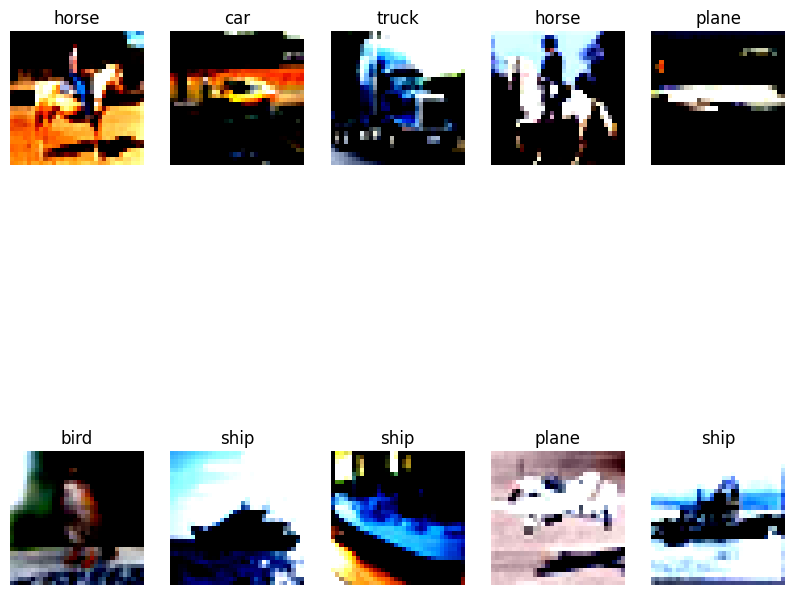

In [20]:

print(f"----****----Wrongly predicted test images: {len(wrongly_predicted_test_images)}")
imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_test_images, image_classes, rows=2, cols=5)

print(f"----****----Correctly predicted test images: {len(correctly_predicted_test_images)}")
imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_test_images, image_classes, rows=2, cols=5)


print(f"----****----Wrongly predicted train images: {len(wrongly_predicted_trained_images)}")
imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_trained_images, image_classes, rows=2, cols=5)

print(f"----****----Correctly predicted train images: {len(correctly_predicted_trained_images)}")
imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_trained_images, image_classes, rows=2, cols=5)
